Import relevant packages

In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm,gamma


In [97]:
# Constants
MEAN = 0.0
PRECISION = 1.0
N = 100
MU_0 = 0.0
LAMB_0 = 0.0 #10.0
A_0 = 0.0 #20
B_0 = 0.0 #20
TOLERANCE = 1e-4

/var/folders/rs/c0n5lhyx7ml6xk3ndk1wy_1m0000gn/T/ipykernel_20921/382868113.py:24: UserWarning: No contour levels were found within the data range.
  plt.contour(*np.meshgrid(mus, taus), Z_Prior.T, levels=5, colors=['green'])


Text(0, 0.5, 'Precision ($\\tau$)')

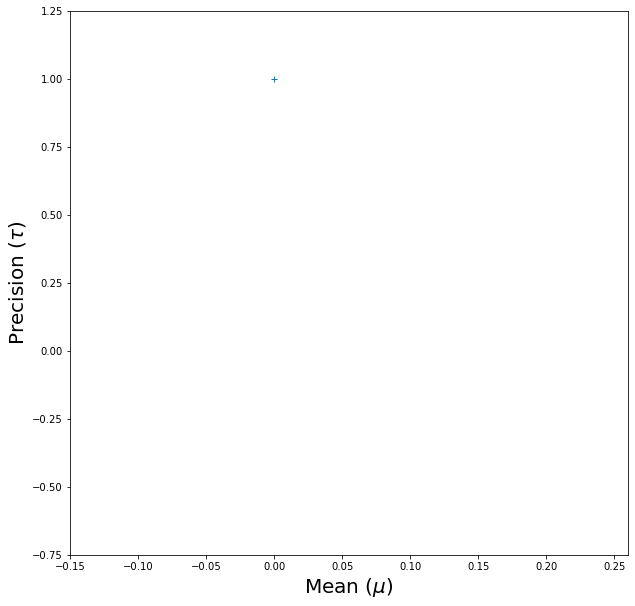

In [98]:
# Generate Interpolation Grid:
mus = np.linspace(-1, 1, 400)
taus = np.linspace(0, 2, 400)
 
# Now we can compute the probabilities:
Z_Prior = np.empty([len(mus), len(taus)])
#  We can create pTau as this is independent of anything:
if B_0 == 0:
    pTau = gamma(a=A_0, loc=0, scale=B_0)
else:
    pTau = gamma(a=A_0, loc=0, scale=1/B_0)
#  Since Mu depends on Tau, we will have to compute this in a loop
for i_t, tau in enumerate(taus):
    if LAMB_0 == 0:
        pMu = norm(loc=MU_0, scale=LAMB_0)
    else:
        pMu = norm(loc=MU_0, scale=1/np.sqrt(LAMB_0 * tau))
 
    Z_Prior[:, i_t] = pMu.pdf(mus) * pTau.pdf(tau)
 
# Now Plot
plt.figure(figsize=[10,10])
plt.plot(MEAN, PRECISION, '+', label='Actual')
plt.contour(*np.meshgrid(mus, taus), Z_Prior.T, levels=5, colors=['green'])
plt.xlim([-0.15, 0.26])
plt.ylim([-0.75, 1.25])
plt.xlabel('Mean ($\mu$)', fontsize=20)
plt.ylabel('Precision ($\\tau$)', fontsize=20)


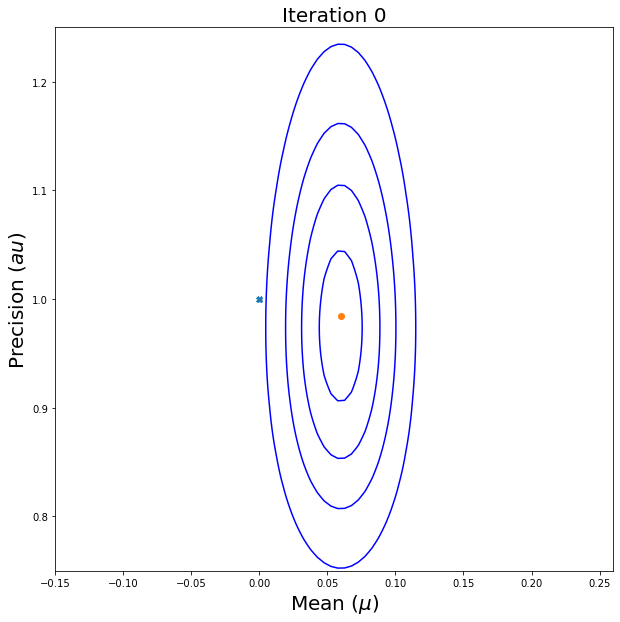

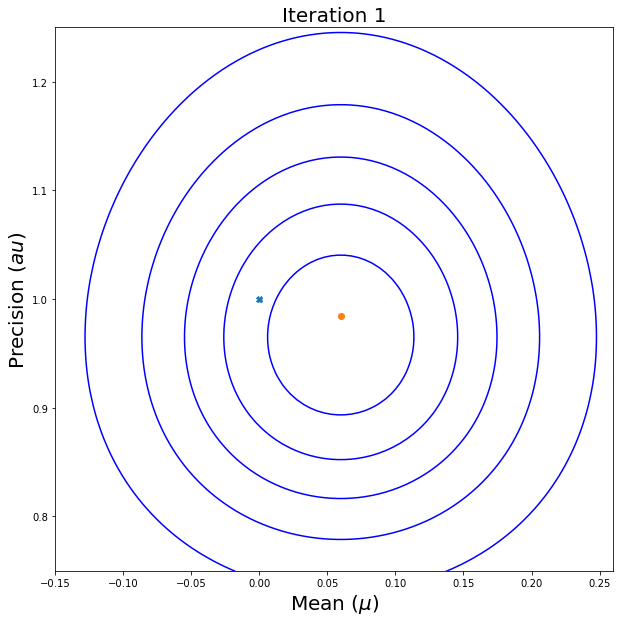

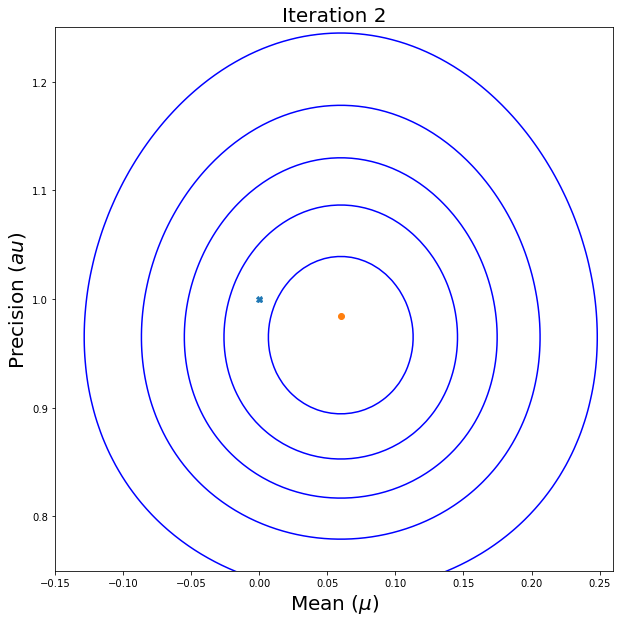

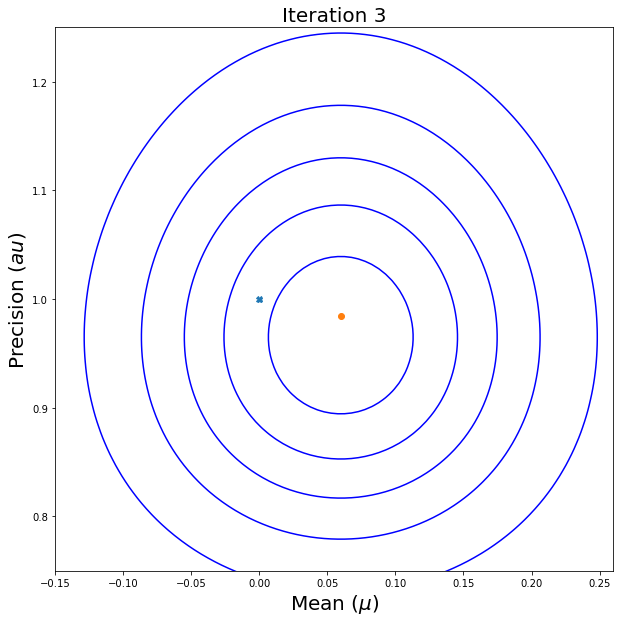

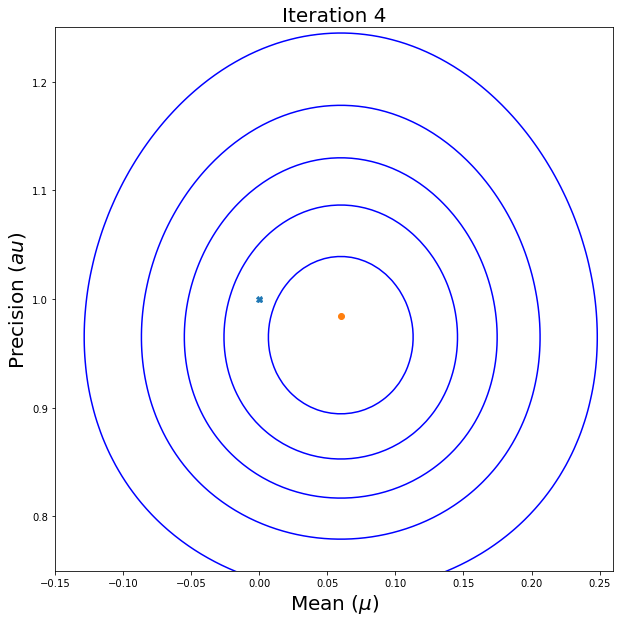

In [108]:
# We need to set up an initial value for tau: let us try 2 just for the sake of it.
E_tau = 10
E_tau_prev = np.NaN  # Keep track of tau until it does not change much:
iterations = 0
 
while np.isnan(E_tau_prev) or (np.abs(E_tau - E_tau_prev) > TOLERANCE):
    # Step A.1
    mu_N = (LAMB_0 * MU_0 + N * X.mean())/(LAMB_0 + N)
    beta_N = (LAMB_0 + N) * E_tau
    # Step A.2
    E_mu = mu_N
    E_mu2 = beta_N ** -1  + E_mu ** 2
    
    # Step B.1
    a_N = A_0 + (N+1)/2
    b_N = B_0 + 0.5 * (np.square(X) - 2 * E_mu * X + E_mu2).sum() + 0.5 * LAMB_0 * (E_mu2 - 2 * E_mu * MU_0 + MU_0**2)
    # Step B.2
    E_tau_prev = E_tau
    E_tau = a_N/b_N
    
    # Now Compute
    #  We will use the same intepolation grid as before: also, since now neither Mu_N nor Beta_N depend on tau directly, we
    #  can compute all at one go:
    pTau = gamma(a=a_N, loc=0, scale=1/b_N)
    pMu = norm(loc=mu_N, scale=1/np.sqrt(beta_N))
    Z_IVI = np.outer(pMu.pdf(mus), pTau.pdf(taus))
    
    # Now Plot
    plt.figure(figsize=[10,10])
    plt.plot(MEAN, PRECISION, 'X', label='Actual')
    plt.plot(X.mean(), 1/X.var(), 'o', label='Estimate')
    plt.contour(*np.meshgrid(mus, taus), Z_IVI.T, levels=5, colors=['blue'])
    plt.xlim([-0.15, 0.26])
    plt.ylim([0.75, 1.25])
    plt.title('Iteration {}'.format(iterations), fontsize=20)
    plt.xlabel('Mean ($\mu$)', fontsize=20)
    _ = plt.ylabel('Precision ($\tau$)', fontsize=20)
    
    iterations += 1

In [104]:
np.abs(E_tau - E_tau_prev)

0.059808015534485